<p style="background-color:limegreen;font-family:newtimeroman;font-size:400%;color:white;text-align:center;border-radius:20px 20px;"><b>Plotly Notebook</b></p>

**Plotly, modern veri bilimi dünyasında veri görselleştirmeye yeni bir soluk getiren interaktif bir görselleştirme kütüphanesidir. Plotly; Python, R ve JavaScript gibi popüler programlama dilleriyle uyumlu olup, kullanıcıya veri analizlerini ve sonuçlarını dinamik bir şekilde sunmaktadır.**

**<b>İçindekiler:</b>**
<ul>
<li><a href="#import-library">Kütüphanelerin Yüklenmesi</a></li>
<li><a href="#loading-dataset">Veri Setinin Yüklenmesi</a></li>
<li><a href="#create-graphs">Plotly İle Grafiklerin Çizilmesi</a></li>
<li><a href="#plotly-animation">Plotly İle Animasyon</a></li>
</ul>

<a id='import-library'></a>
# <font color='mediumseagreen'> <b>Kütüphanelerin Yüklenmesi</b><font color='black'> 

In [5]:
# !pip install plotly
# !pip install dash
# !pip install wordcloud
# !pip install cufflinks
# !pip install missingno

In [6]:
import numpy as np 
import pandas as pd
import seaborn as sns
import os
import missingno

import plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected = True) 

import plotly.graph_objs as go 
import plotly.express as px 

from wordcloud import WordCloud

import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()

import warnings
warnings.filterwarnings("ignore")

<a id='loading-dataset'></a>
# <font color='mediumseagreen'> <b>Veri Setinin Yüklenmesi</b><font color='black'> 

In [8]:
timesData = pd.read_csv("https://raw.githubusercontent.com/arnaudbenard/university-ranking/master/timesData.csv")
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [9]:
# plotly'de kullanmak için timesData verisinin ilk 100 satırını alalım.
df = timesData.iloc[:100, :]

<a id='create-graphs'></a>
# <font color='mediumseagreen'> <b>Plotly İle Grafiklerin Çizilmesi</b><font color='black'> 

## <font color='lightseagreen'> <b>Çizgi Grafiği (Line Chart)</b><font color='black'> 

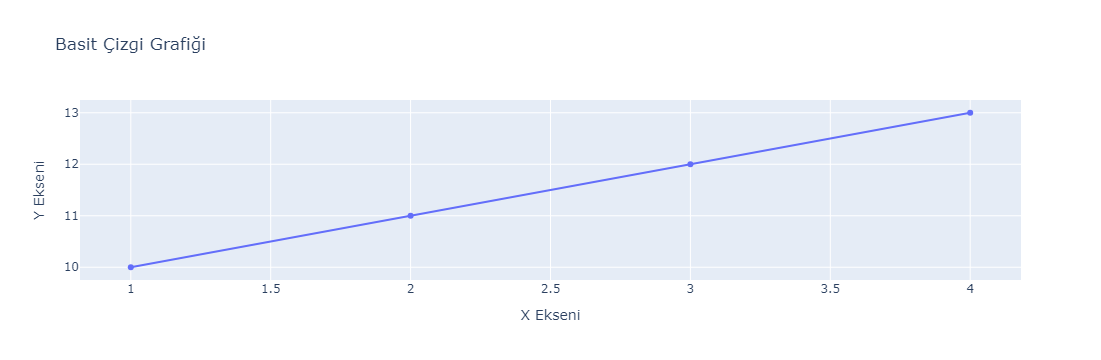

In [12]:
import plotly.graph_objects as go

# Data
trace = go.Scatter(x=[1, 2, 3, 4], y=[10, 11, 12, 13])

# Layout
layout = go.Layout(title='Basit Çizgi Grafiği', xaxis=dict(title='X Ekseni'), yaxis=dict(title='Y Ekseni'))

# Figure
fig = go.Figure(data=[trace], layout=layout)

# Çizim
fig.show()

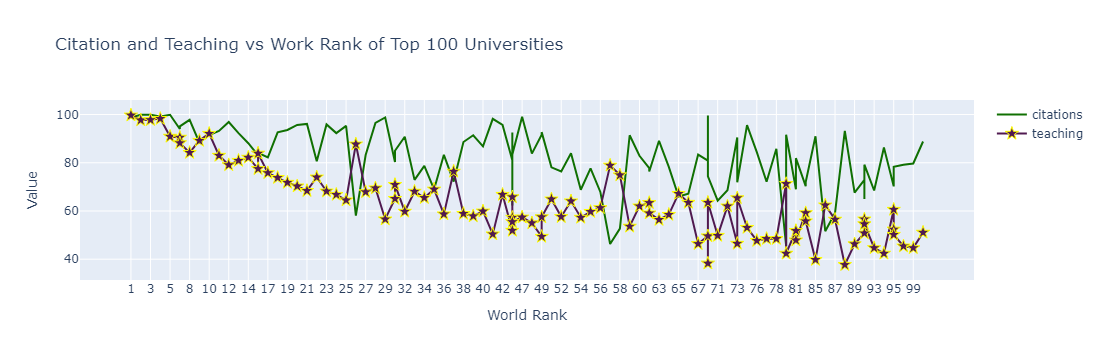

In [13]:
#plt.style.use("ggplot")

trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = "rgb(16, 112, 2)"), # {"color" : "rgb(16, 112, 2)"}
                    text = df.university_name)

trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines + markers",
                    name = "teaching",
                    marker = dict(color = "rgb(80,26,80)",
                                  size = 10,
                                  symbol = "star",
                                  line = dict(
                                         color = "yellow",
                                         width = 1),),
                    text = df.university_name)

data = [trace1, trace2]

layout = dict(title = "Citation and Teaching vs Work Rank of Top 100 Universities", 
              xaxis = dict(title = "World Rank", ticklen = 5, tickcolor = "crimson", zeroline = False),
              yaxis = dict(title = "Value", ticklen = 5, tickcolor = "crimson", zeroline = False))

fig = dict(data = data, layout = layout)
iplot(fig)

## <font color='lightseagreen'> <b>Dağılım Grafiği (Scatter Plot)</b><font color='black'> 

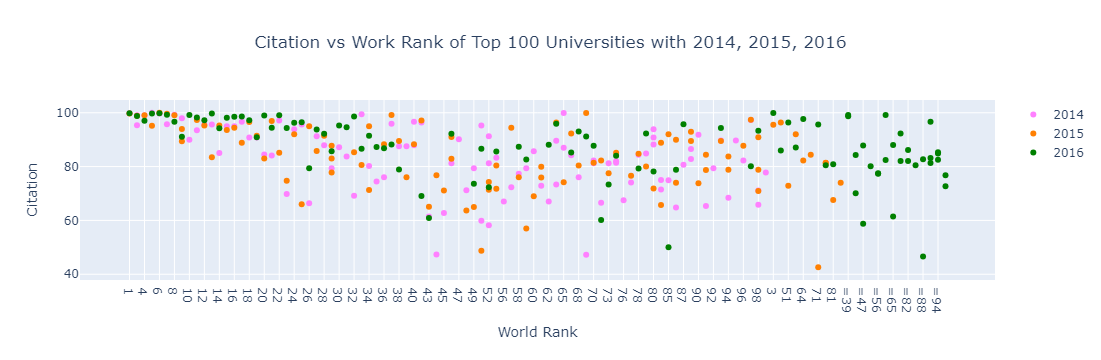

In [15]:
# Filtering the data to include the top 100 universities' citation counts for the years 2014, 2015, and 2016.
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]

trace1 = go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = "rgb(255,128,255)"),
                    text = df2014.university_name)

trace2 = go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = "rgb(255,128,2)"),
                    text = df2015.university_name)

trace3 = go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = "green"),
                    text = df2016.university_name)
data = [trace1, trace2, trace3]

layout = dict(title = "Citation vs Work Rank of Top 100 Universities with 2014, 2015, 2016",title_x = 0.5, title_y = 0.9,
             xaxis = dict(title = "World Rank"),
             yaxis = dict(title = "Citation"))

fig = dict(data = data, layout = layout)
iplot(fig)

## <font color='lightseagreen'> <b>Bar Grafiği</b><font color='black'> 

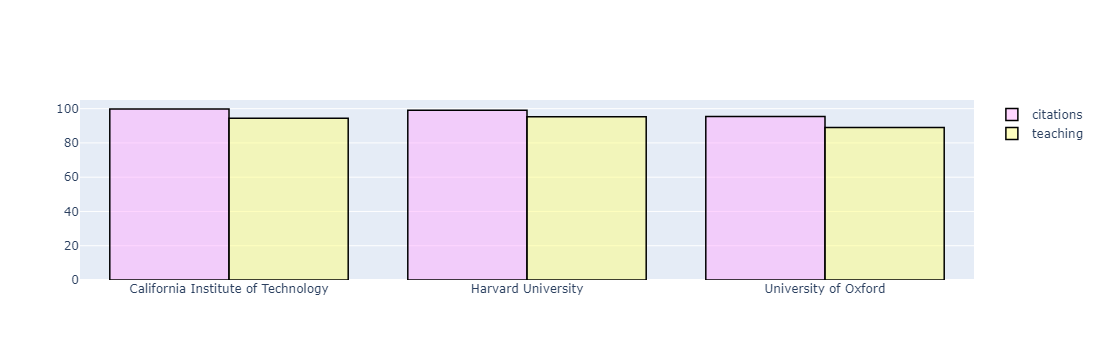

In [17]:
# data frame'i oluşturma
df2014 = timesData[timesData.year == 2014].iloc[:3,:]


import plotly.graph_objs as go

trace1 = go.Bar(
                x = df2014.university_name,
                y = df2014.citations,
                name = "citations",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Bar(
                x = df2014.university_name,
                y = df2014.teaching,
                name = "teaching",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## <font color='lightseagreen'> <b>Pasta Grafiği (Pie Chart)</b><font color='black'> 

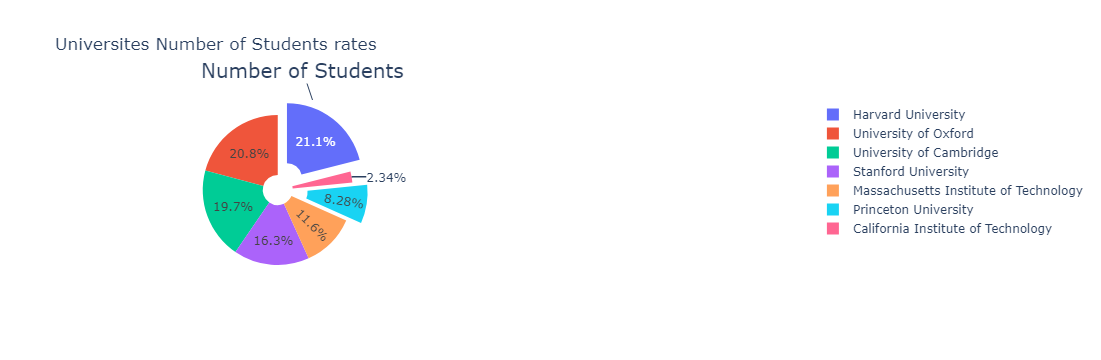

In [19]:
# Önce 2016 yılına ait verileri ve ilk 7 kaydı alıyoruz.
df2016 = timesData[timesData.year == 2016].iloc[:7,:]

# num_students sütununu alıp, virgülleri kaldırıyoruz ve stringi float'a çeviriyoruz.
df = df2016.num_students
df1 = (df.str.replace(",", "")).astype("float")
df2 = list((df.str.replace(",", "")).astype("float"))

# List comprehension ile num_students sütunundaki değerleri float’a çeviriyoruz.
pie_list = [float(each.replace(",", "")) for each in df2016.num_students]

# labels değişkeni ile pasta grafiği dilimlerine isimlerini yerleştiriyoruz.
labels = df2016.university_name

# Figure objesini oluşturuyoruz. 
fig = {
    "data" : [
        {
            "values" : pie_list,  # Yüzdelik dilimleri belirleyecek olan değerler.
            "labels" : labels,  # Her bir dilimin etiketi.
            "domain" : {"x": [0, .5]},  # Grafikteki konumu.
            "name" : "Number Of Students Rates",  # Grafik ismi.
            "hoverinfo" : "label + percent",  # Fareyle üzerine gelindiğinde gösterilecek bilgi.
            "hole" : .2,  # Ortadaki boşluğun büyüklüğü, bu bir donut grafiği yapar.
            "type" : "pie",  # Grafik türü.
            "pull" : [0,0,0,0,0, 0.2, 0.2]  # Belirli dilimleri vurgulamak için çekiyoruz, burada son iki dilim çekilmiş.
        },
    ],
    "layout" : {
        "title" : "Universites Number of Students rates",  # Ana başlık.
        "annotations" : [
            {"font" : {"size" : 20},  # Font büyüklüğü.
             "text" : "Number of Students",  # Yorum yazısı.
             "x" : 0.3,  # X konumu.
             "y" : 1  # Y konumu.
            },
        ]
    }
}

# Oluşturulan Figure objesini çizdiriyoruz.
iplot(fig)

## <font color='lightseagreen'> <b>Baloncuk Grafiği (Buble Chart)</b><font color='black'> 

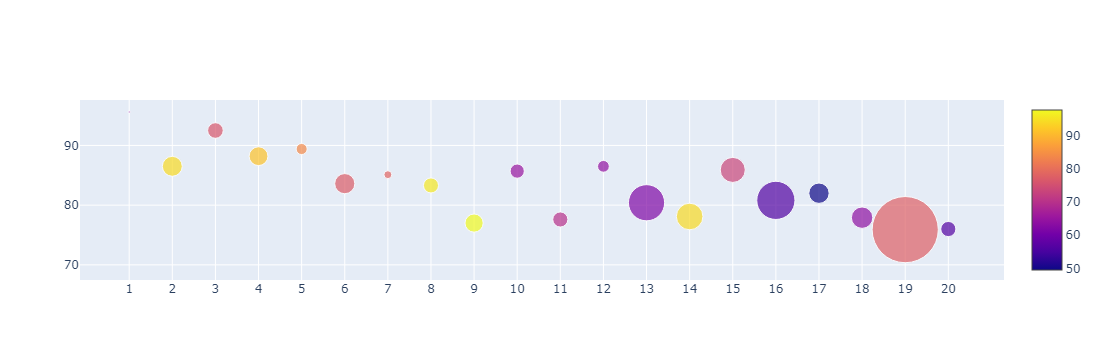

In [21]:
df2016 = timesData[timesData.year == 2016].iloc[:20,:]  # 2016 yılında dünyanın en iyi 20 üniversitesini seç

num_students_size  = [float(each.replace(",", ".")) for each in df2016.num_students]  # num_students kolonunu float tipine çevir

international_color = [float(each) for each in df2016.international]  # international kolonunu float tipine çevir

data = [  # Scatter plot oluşturulacak data'yı tanımla
    {
        "y" : df2016.teaching,  # y ekseni olarak teaching kolonunu kullan
        "x" : df2016.world_rank,  # x ekseni olarak world_rank kolonunu kullan
        "mode" : "markers",  # scatter plot için markers modunu kullan
        "marker" : {  # marker özelliklerini ayarla
            "color" : international_color,  # marker rengini international_color listesiyle belirle
            "size" : num_students_size,  # marker boyutunu num_students_size listesiyle belirle
            "showscale" : True  # renk ölçeğini göster
        },
        "text" : df2016.university_name  # her marker için üniversite ismini göster
    }
]
iplot(data)  # grafiği çiz

## <font color='lightseagreen'> <b>Histogram Grafiği</b><font color='black'> 

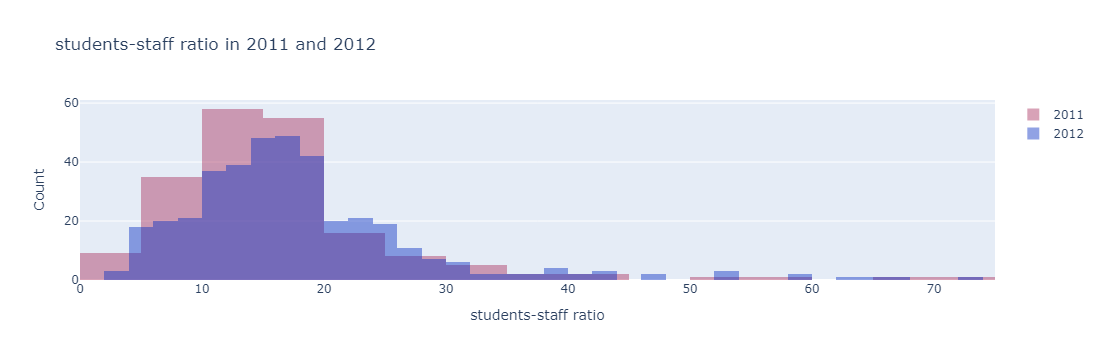

In [23]:
# 1. 2011 yılına ait öğrenci-personel oranını x2011 değişkenine atar.
x2011 = timesData.student_staff_ratio[timesData.year == 2011]

# 2. 2012 yılına ait öğrenci-personel oranını x2012 değişkenine atar.
x2012 = timesData.student_staff_ratio[timesData.year == 2012]

# 3. 2011 yılı için bir histogram oluşturur.
trace1 = go.Histogram(
    x=x2011,  # X eksenine x2011 değişkenini atar.
    opacity=0.75,  # Histogramın şeffaflığını belirler.
    name = "2011",  # Histogramın adını belirler.
    marker=dict(color='rgba(171, 50, 96, 0.6)')  # Histogramın rengini belirler.
)

# 4. 2012 yılı için bir başka histogram oluşturur.
trace2 = go.Histogram(
    x=x2012,  # X eksenine x2012 değişkenini atar.
    opacity=0.75,  # Histogramın şeffaflığını belirler.
    name = "2012",  # Histogramın adını belirler.
    marker=dict(color='rgba(12, 50, 196, 0.6)')  # Histogramın rengini belirler.
)

# 5. İki histogramı bir veri listesi içine alır.
data = [trace1, trace2]

# 6. Grafiğin düzenini ve başlıklarını ayarlar.
layout = go.Layout(
    barmode='overlay',  # İki histogramın üst üste gelmesini sağlar.
    title=' students-staff ratio in 2011 and 2012',  # Grafiğin başlığını belirler.
    xaxis=dict(title='students-staff ratio'),  # X ekseninin başlığını belirler.
    yaxis=dict(title='Count')  # Y ekseninin başlığını belirler.
)

# 7. Veri ve düzeni kullanarak bir Figure nesnesi oluşturur.
fig = go.Figure(data=data, layout=layout)

# 8. Oluşturulan Figure nesnesini çizer.
iplot(fig)

## <font color='lightseagreen'> <b>Kelime Bulutu (Word Cloud)</b><font color='black'> 

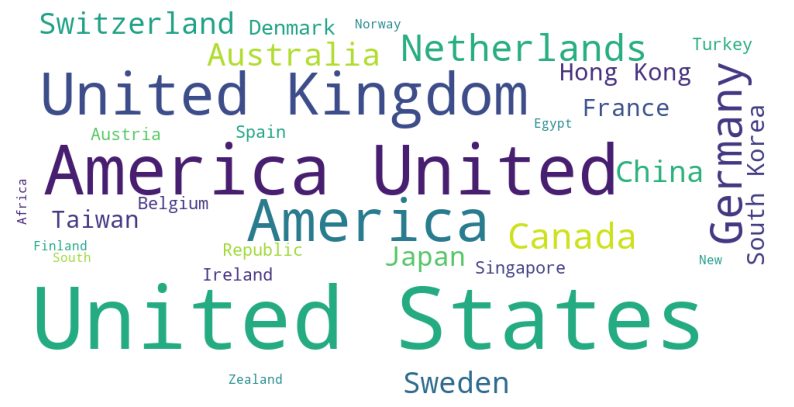

In [25]:
# 1. 2011 yılına ait ülkeleri x2011 değişkenine atar.
x2011 = timesData.country[timesData.year == 2011]

# 2. 10x10 boyutlarında bir subplot oluşturur.
plt.subplots(figsize = (10, 10))

# 3. x2011 değişkenindeki ülkeleri birleştirerek bir kelime bulutu oluşturur.
wordcloud = WordCloud(
    background_color= "white",  # Kelime bulutunun arka plan rengini beyaz olarak ayarlar.
    width = 1000,  # Kelime bulutunun genişliğini belirler.
    height= 500  # Kelime bulutunun yüksekliğini belirler.
).generate(" ".join(x2011))

# 4. Oluşturulan kelime bulutunu gösterir.
plt.imshow(wordcloud)

# 5. Grafiğin eksenlerini kapatır, böylece sadece kelime bulutu görünür.
plt.axis("off")

# 6. Grafiği bilgisayarınıza "graph.png" adıyla kaydeder.
plt.savefig("graph.png")

# 7. Grafiği ekranda gösterir.
plt.show()

## <font color='lightseagreen'> <b>Kutu Grafiği (Box Plot)</b><font color='black'> 

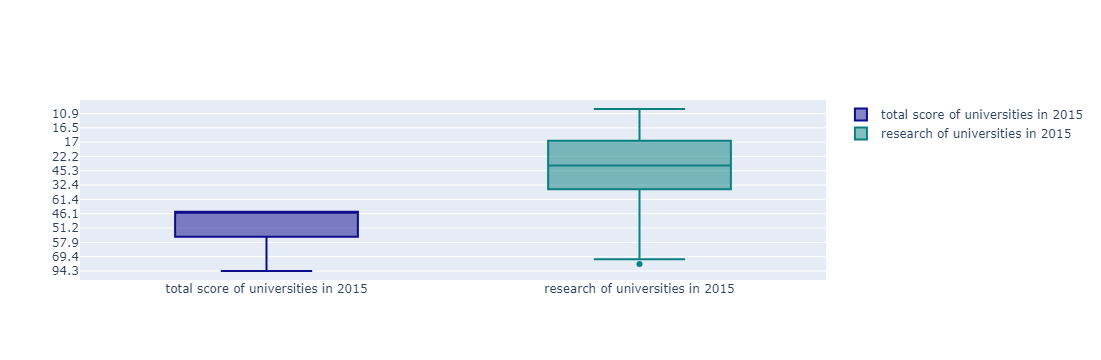

In [27]:
# 1. 2015 yılına ait verileri x2015 değişkenine atar.
x2015 = timesData[timesData.year == 2015]

# 2. x2015.total_score verilerini kullanarak bir Box Plot oluşturur.
trace0 = go.Box(
    y=x2015.total_score,  # Box Plot'un y ekseninde gösterilecek veriyi belirtir.
    name = 'total score of universities in 2015',  # Grafiğin adını belirtir.
    marker = dict(color = 'rgb(12, 12, 140)')  # Grafiğin rengini belirtir.
)

# 3. x2015.research verilerini kullanarak bir Box Plot oluşturur.
trace1 = go.Box(
    y=x2015.research,  # Box Plot'un y ekseninde gösterilecek veriyi belirtir.
    name = 'research of universities in 2015',  # Grafiğin adını belirtir.
    marker = dict(color = 'rgb(12, 128, 128)')  # Grafiğin rengini belirtir.
)

# 4. Oluşturulan Box Plot'ları bir liste içerisinde toplar.
data = [trace0, trace1]

# 5. Oluşturulan Box Plot'ları çizer.
iplot(data)

## <font color='lightseagreen'> <b>Scatter Matrix Plots</b><font color='black'> 

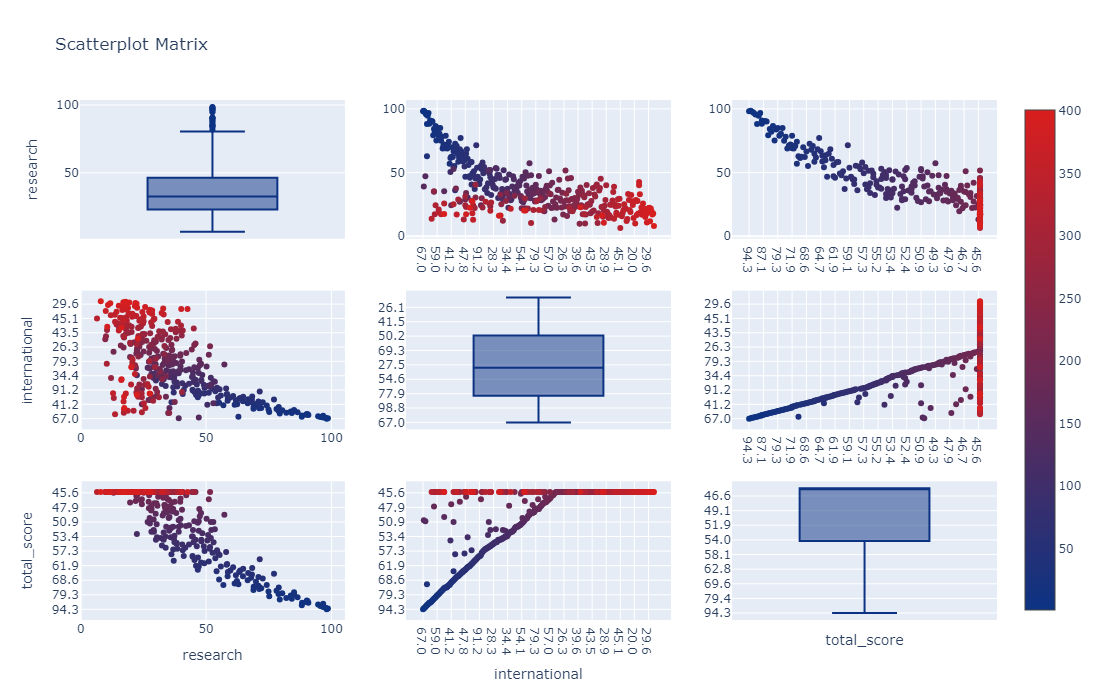

In [29]:
# 1. Plotly'nin figure_factory modülünü içe aktarır.
import plotly.figure_factory as ff

# 2. 2015 yılına ait verileri dataframe değişkenine atar.
dataframe = timesData[timesData.year == 2015]

# 3. dataframe değişkeninden belirli sütunları seçer ve data2015 değişkenine atar.
data2015 = dataframe.loc[:,["research","international", "total_score"]]

# 4. data2015 DataFrame'ine yeni bir "index" sütunu ekler ve bu sütuna ardışık sayılar atar.
data2015["index"] = np.arange(1,len(data2015)+1)

# 5. data2015 verilerini kullanarak bir scatter plot matrisi oluşturur.
fig = ff.create_scatterplotmatrix(data2015, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat', height=700, width=700)

# 6. Oluşturulan scatter plot matrisini çizer.
iplot(fig)

<a id='plotly-animation'></a>
# <font color='mediumseagreen'> <b>Plotly İle Animasyon</b><font color='black'> 

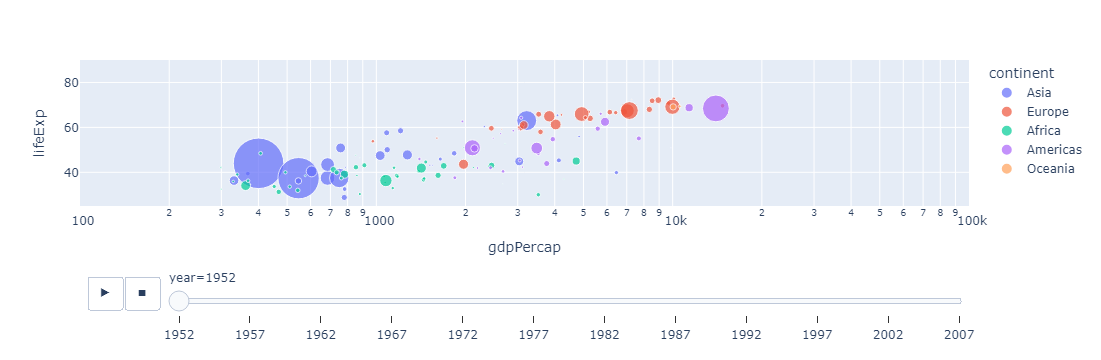

In [31]:
import plotly.express as px  # Plotly Express kütüphanesini içe aktarır.
df = px.data.gapminder()  # Gapminder veri setini df değişkenine yükler.

# px.scatter fonksiyonunu kullanarak bir scatter grafiği oluşturur. 
# Bu grafikte x ekseninde kişi başına düşen gelir (GDP per Capita), 
# y ekseninde ise yaşam beklentisi (Life Expectancy) bulunmaktadır.
# animation_frame ile yıllara göre animasyon eklenirken, 
# animation_group ile ülkeler animasyon grupları olarak belirlenmiştir.
# size parametresi ile noktaların boyutu ülkenin nüfusuna göre ayarlanmıştır.
# color parametresi ile noktalar kıtalarına göre renklendirilmiştir.
# hover_name ile fareyle üzerine gelindiğinde ülkenin adı gösterilmiştir.
# log_x=True ile x ekseni için logaritmik ölçek kullanılmıştır.
# size_max=55 ile noktanın maksimum boyutu belirlenmiştir.
# range_x ve range_y ile x ve y eksenleri için değer aralıkları belirlenmiştir.
px.scatter(df, 
           x="gdpPercap",
           y="lifeExp",
           animation_frame="year",
           animation_group="country",
           size="pop",
           color="continent",
           hover_name="country",
           log_x=True,
           size_max=55,
           range_x=[100,100000],
           range_y=[25,90])

Sonuç olarak; Plotly, yenilikçi yaklaşımın öncülerinden biri olarak, sadece grafikler oluşturmayı değil, aynı zamanda bu grafiklerle etkileşim kurmayı mümkün kılmaktadır. Bu durum, hem bilgi sunumunun kalitesini artırırken, analizlerin daha derinlemesine yapılmasına olanak tanımaktadır.